In [3]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta

def get_data(symbol: str):
    data = yf.download(tickers=symbol, period='1y', interval='1d')
    data.reset_index(inplace=True, drop=True)
    return data
# Get the data
data = get_data('BTC-USD')

[*********************100%%**********************]  1 of 1 completed


In [4]:
# Calculate Bollinger Bands using pandas_ta
data.ta.bbands(length=10, std=1.5, append=True)

# Add the upper and lower bands to the DataFrame
data['Upper Band'] = data['BBU_10_1.5']
data['Lower Band'] = data['BBL_10_1.5']

def calculate_sma(data, length: int):
    return ta.sma(data['Close'], length)

# Calculate the moving average
data['SMA'] = calculate_sma(data, 20)
data.dropna(inplace=True)

In [5]:
data

,Open,High,Low,Close,Adj Close,Volume,BBL_10_1.5,BBM_10_1.5,BBU_10_1.5,BBB_10_1.5,BBP_10_1.5,Upper Band,Lower Band,SMA
19,29416.593750,29441.433594,29265.806641,29282.914062,29282.914062,7329897180,28977.163437,29319.182422,29661.201407,2.333073,0.446979,29661.201407,28977.163437,29308.641602
20,29283.263672,29660.253906,29124.105469,29408.443359,29408.443359,14013695304,29032.088700,29352.617578,29673.146456,2.183988,0.587084,29673.146456,29032.088700,29317.694238
21,29408.048828,29439.121094,29088.853516,29170.347656,29170.347656,12640195779,29068.534148,29365.439648,29662.345149,2.022142,0.171458,29662.345149,29068.534148,29308.462988
22,29169.074219,29221.976562,28701.779297,28701.779297,28701.779297,14949271904,28930.069555,29331.432031,29732.794507,2.736740,-0.284394,29732.794507,28930.069555,29283.017480
23,28699.802734,28745.947266,25409.111328,26664.550781,26664.550781,31120851211,27809.476909,29079.829297,30350.181685,8.737000,-0.450633,30350.181685,27809.476909,29150.282715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,67164.914062,68372.906250,65842.296875,68154.523438,68154.523438,26652190004,58906.503790,63800.769922,68695.036054,15.342342,0.944781,68695.036054,58906.503790,60890.254883
363,68152.976562,68480.062500,66611.296875,67585.250000,67585.250000,42649109453,60618.467090,64769.348437,68920.229785,12.817425,0.839193,68920.229785,60618.467090,61168.066602
364,67584.804688,67779.015625,65484.460938,65927.671875,65927.671875,35605668666,62336.687443,65438.920312,68541.153182,9.481308,0.578774,68541.153182,62336.687443,61455.754102
365,65927.859375,67113.984375,65146.996094,65372.132812,65372.132812,27470942309,63827.434785,65897.354297,67967.273808,6.282254,0.373130,67967.273808,63827.434785,61875.475586


In [6]:
def check_candles(data, backcandles, ma_column):
    categories = [0 for _ in range(backcandles)]
    for i in range(backcandles, len(data)):
        if all(data['Close'][i-backcandles:i] > data[ma_column][i-backcandles:i]):
            categories.append(2)  # Uptrend
        elif all(data['Close'][i-backcandles:i] < data[ma_column][i-backcandles:i]):
            categories.append(1)  # Downtrend
        else:
            categories.append(0)  # No trend
    return categories

# Apply the function to the DataFrame
data['Trend'] = check_candles(data, 7, 'SMA')

In [7]:
data

,Open,High,Low,Close,Adj Close,Volume,BBL_10_1.5,BBM_10_1.5,BBU_10_1.5,BBB_10_1.5,BBP_10_1.5,Upper Band,Lower Band,SMA,Trend
19,29416.593750,29441.433594,29265.806641,29282.914062,29282.914062,7329897180,28977.163437,29319.182422,29661.201407,2.333073,0.446979,29661.201407,28977.163437,29308.641602,0
20,29283.263672,29660.253906,29124.105469,29408.443359,29408.443359,14013695304,29032.088700,29352.617578,29673.146456,2.183988,0.587084,29673.146456,29032.088700,29317.694238,0
21,29408.048828,29439.121094,29088.853516,29170.347656,29170.347656,12640195779,29068.534148,29365.439648,29662.345149,2.022142,0.171458,29662.345149,29068.534148,29308.462988,0
22,29169.074219,29221.976562,28701.779297,28701.779297,28701.779297,14949271904,28930.069555,29331.432031,29732.794507,2.736740,-0.284394,29732.794507,28930.069555,29283.017480,0
23,28699.802734,28745.947266,25409.111328,26664.550781,26664.550781,31120851211,27809.476909,29079.829297,30350.181685,8.737000,-0.450633,30350.181685,27809.476909,29150.282715,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,67164.914062,68372.906250,65842.296875,68154.523438,68154.523438,26652190004,58906.503790,63800.769922,68695.036054,15.342342,0.944781,68695.036054,58906.503790,60890.254883,2
363,68152.976562,68480.062500,66611.296875,67585.250000,67585.250000,42649109453,60618.467090,64769.348437,68920.229785,12.817425,0.839193,68920.229785,60618.467090,61168.066602,2
364,67584.804688,67779.015625,65484.460938,65927.671875,65927.671875,35605668666,62336.687443,65438.920312,68541.153182,9.481308,0.578774,68541.153182,62336.687443,61455.754102,2
365,65927.859375,67113.984375,65146.996094,65372.132812,65372.132812,27470942309,63827.434785,65897.354297,67967.273808,6.282254,0.373130,67967.273808,63827.434785,61875.475586,2


In [8]:
# Check conditions and assign entry values
data['entry'] = 0

# Condition for entry category 2 (buy entry)
buy_entry_condition = (data['Trend'] == 2) & ((data['Open'] < data['Lower Band']) & (data['Close'] > data['Lower Band']))
data.loc[buy_entry_condition, 'entry'] = 2

# Condition for entry category 1 (sell entry)
sell_entry_condition = (data['Trend'] == 1) & ((data['Open'] > data['Upper Band']) & (data['Close'] < data['Upper Band']))
data.loc[sell_entry_condition, 'entry'] = 1

In [9]:
data[data['entry']!=0]

,Open,High,Low,Close,Adj Close,Volume,BBL_10_1.5,BBM_10_1.5,BBU_10_1.5,BBB_10_1.5,BBP_10_1.5,Upper Band,Lower Band,SMA,Trend,entry
141,41468.464844,43429.781250,40676.867188,42890.742188,42890.742188,26797884674,41474.546768,43035.693750,44596.840732,7.255126,0.453575,44596.840732,41474.546768,40607.654883,2,2
214,50736.371094,51684.195312,50585.445312,51571.101562,51571.101562,15174077879,51083.919544,51739.552344,52395.185144,2.534358,0.371536,52395.185144,51083.919544,49374.920312,2,2
310,67576.085938,69500.539062,67118.078125,68364.992188,68364.992188,29509712534,67628.069539,68713.242969,69798.416399,3.158557,0.339541,69798.416399,67628.069539,66852.354492,2,2


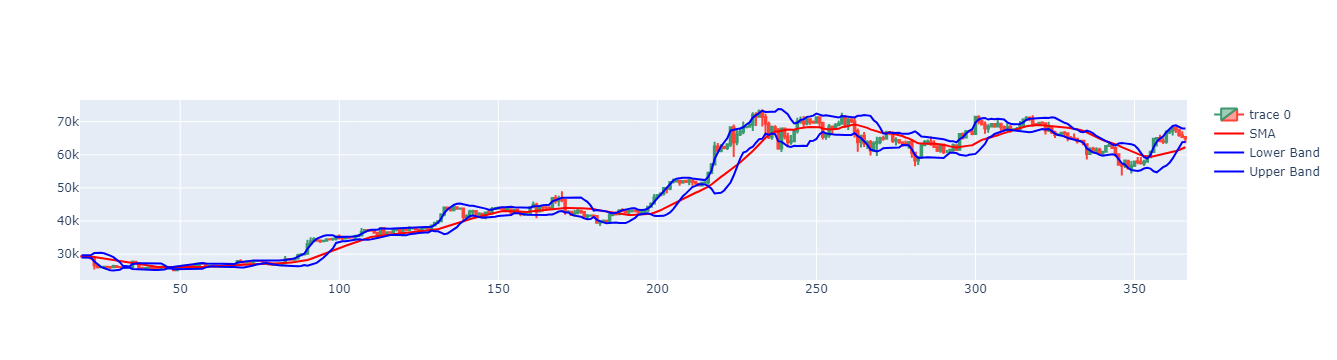

In [31]:
import plotly.graph_objects as go

dfpl = data[:]
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close'])])

# Add the moving averages to the plot
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['SMA'], mode='lines', name='SMA', line=dict(color='red')))
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['Lower Band'], mode='lines', name='Lower Band', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=dfpl.index, y=dfpl['Upper Band'], mode='lines', name='Upper Band', line=dict(color='blue')))

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [21]:
def add_rsi_column(data):
    # Calculate RSI with a period of 14
    data['RSI'] = ta.rsi(data['Close'])
    return data

data = add_rsi_column(data)

In [22]:
def rsi_signal(data):
    data['RSI Signal'] = 0  # Initialize the signal column with 0

    # Set the signal category to 2 when the price is below the lower Bollinger Band and RSI is below 30
    data.loc[(data['Close'] < data['Lower Band']) & (data['RSI'] < 55), 'RSI Signal'] = 2

    # Set the signal category to 1 when the price is above the upper Bollinger Band and RSI is above 70
    data.loc[(data['Close'] > data['Upper Band']) & (data['RSI'] > 45), 'RSI Signal'] = 1

    return data

In [23]:
data = rsi_signal(data)

In [24]:
data[data["RSI Signal"]!=0]

,Open,High,Low,Close,Adj Close,Volume,BBL_10_1.5,BBM_10_1.5,BBU_10_1.5,BBB_10_1.5,BBP_10_1.5,Upper Band,Lower Band,SMA,Trend,entry,RSI,RSI Signal,shooting_star
35,26102.486328,28089.337891,25912.628906,27727.392578,27727.392578,29368391712,25554.178289,26291.876172,27029.574055,5.611603,1.472970,27029.574055,25554.178289,27326.791504,1,1,54.011248,1,0
36,27726.083984,27760.160156,27069.207031,27297.265625,27297.265625,16343655235,25541.442236,26402.644336,27263.846435,6.523605,1.019403,27263.846435,25541.442236,27220.175195,0,0,48.198293,1,0
48,25831.714844,25883.947266,24930.296875,25162.654297,25162.654297,14600006467,25438.818902,25822.040820,26205.262739,2.968177,-0.360319,26205.262739,25438.818902,26091.162598,0,0,31.908012,2,0
51,26228.277344,26774.623047,26171.451172,26539.673828,26539.673828,13811359124,25393.491876,25917.096875,26440.701874,4.040615,1.094510,26440.701874,25393.491876,26089.145605,0,0,51.446634,1,0
52,26533.818359,26840.498047,26240.701172,26608.693359,26608.693359,11479735788,25398.221550,25999.967969,26601.714387,4.628824,1.005799,26601.714387,25398.221550,26119.157129,0,0,52.257091,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,58239.429688,58371.121094,55793.324219,55849.109375,55849.109375,20553359505,56009.566932,59673.345313,63337.123693,12.279447,-0.021898,63337.123693,56009.566932,61384.542969,1,0,30.634343,2,0
354,57908.738281,59787.078125,57796.441406,59231.953125,59231.953125,17080061806,56091.994415,57472.587891,58853.181366,4.804355,1.137177,58853.181366,56091.994415,59408.236914,1,1,45.268561,1,0
355,59225.250000,61329.527344,59225.250000,60787.792969,60787.792969,22223416061,55854.300176,57853.596875,59852.893574,6.911573,1.233807,59852.893574,55854.300176,59433.755859,1,1,50.771532,1,0
356,60815.457031,64870.152344,60704.929688,64870.152344,64870.152344,38094526099,55035.782803,58674.374609,62312.966416,12.402661,1.351398,62312.966416,55035.782803,59587.031445,0,0,61.663451,1,0


In [25]:
data['entry'] = 0

# Condition for entry category 2 (buy entry)
buy_entry_condition = (data['Trend'] == 2) & (data['RSI Signal'] == 2) & (data['Low'] < data['Lower Band'])
data.loc[buy_entry_condition, 'entry'] = 2

# Condition for entry category 1 (sell entry)
sell_entry_condition = (data['Trend'] == 1) & (data['RSI Signal'] == 1) & (data['High'] > data['Upper Band'])
data.loc[sell_entry_condition, 'entry'] = 1

In [26]:
data[data['entry']!=0]

,Open,High,Low,Close,Adj Close,Volume,BBL_10_1.5,BBM_10_1.5,BBU_10_1.5,BBB_10_1.5,BBP_10_1.5,Upper Band,Lower Band,SMA,Trend,entry,RSI,RSI Signal,shooting_star
35,26102.486328,28089.337891,25912.628906,27727.392578,27727.392578,29368391712,25554.178289,26291.876172,27029.574055,5.611603,1.472970,27029.574055,25554.178289,27326.791504,1,1,54.011248,1,0
61,26579.373047,26716.058594,26221.050781,26256.826172,26256.826172,8192867686,26270.425639,26679.198633,27087.971627,3.064357,-0.016634,27087.971627,26270.425639,26298.147754,2,2,45.476578,2,0
78,27392.076172,27474.115234,26561.099609,26873.320312,26873.320312,13648094333,27102.278649,27587.461523,28072.644398,3.517416,-0.235951,28072.644398,27102.278649,27152.189063,2,2,46.368170,2,0
188,42030.914062,43305.867188,41818.332031,43288.246094,43288.246094,20668476578,39397.182119,41183.593750,42970.005381,8.675356,1.089073,42970.005381,39397.182119,42180.707617,1,1,55.550171,1,0
235,69392.484375,70046.273438,64801.394531,65315.117188,65315.117188,46842198371,66067.799433,69554.842969,73041.886504,10.026745,-0.107926,73041.886504,66067.799433,65836.782227,2,2,54.745461,2,0
252,69705.023438,69708.382812,64586.593750,65446.972656,65446.972656,50705240709,66880.723037,69340.201953,71799.680869,7.093948,-0.291474,71799.680869,66880.723037,67930.776172,2,2,47.286223,2,0
272,64935.632812,67233.960938,64548.179688,66837.679688,66837.679688,28282686673,62070.372046,64219.005469,66367.638892,6.691581,1.109381,66367.638892,62070.372046,66569.537500,1,1,51.815627,1,0
311,68362.515625,68999.562500,66633.421875,67491.414062,67491.414062,27387283769,67499.901423,68448.731250,69397.561077,2.772381,-0.004473,69397.561077,67499.901423,67187.239648,2,2,52.360826,2,0
322,69508.078125,69549.414062,66123.601562,67332.031250,67332.031250,37116136345,67669.533616,69410.479688,71151.425759,5.016378,-0.096931,71151.425759,67669.533616,68858.835547,2,2,46.783723,2,0
354,57908.738281,59787.078125,57796.441406,59231.953125,59231.953125,17080061806,56091.994415,57472.587891,58853.181366,4.804355,1.137177,58853.181366,56091.994415,59408.236914,1,1,45.268561,1,0


In [27]:
def identify_shooting_star(data):
    # Create a new column for shooting star
    data['shooting_star'] = data.apply(lambda row: 2 if (
        ( (min(row['Open'], row['Close']) - row['Low']) > (1.5 * abs(row['Close'] - row['Open']))) and 
        (row['High'] - max(row['Close'], row['Open'])) < (0.8 * abs(row['Close'] - row['Open'])) and 
        (abs(row['Open'] - row['Close']) > row['Open'] * 0.01)
    ) else 1 if (
        (row['High'] - max(row['Open'], row['Close'])) > (1.5 * abs(row['Open'] - row['Close'])) and 
        (min(row['Close'], row['Open']) - row['Low']) < (0.8 * abs(row['Open'] - row['Close'])) and 
        (abs(row['Open'] - row['Close']) > row['Open'] * 0.01)
    ) else 0, axis=1)

    return data

In [28]:
data = identify_shooting_star(data)

In [29]:
data[data['shooting_star']!=0]

,Open,High,Low,Close,Adj Close,Volume,BBL_10_1.5,BBM_10_1.5,BBU_10_1.5,BBB_10_1.5,BBP_10_1.5,Upper Band,Lower Band,SMA,Trend,entry,RSI,RSI Signal,shooting_star
91,33077.304688,35150.433594,32880.761719,33901.527344,33901.527344,44934999645,26715.412692,29772.603516,32829.794339,20.536940,1.175281,32829.794339,26715.412692,28566.068652,2,0,86.905461,1,1
122,37296.316406,38415.339844,37261.605469,37720.281250,37720.281250,22922957823,36040.290339,37033.729688,38027.169036,5.365052,0.845543,38027.169036,36040.290339,36588.126172,0,0,61.630927,0,1
233,73079.375000,73750.070312,68563.023438,71396.593750,71396.593750,59594605698,64865.113406,69073.754297,73282.395188,12.185934,0.775961,73282.395188,64865.113406,64266.054688,2,0,72.370916,0,2
234,71387.875000,72357.132812,65630.695312,69403.773438,69403.773438,78320453976,66351.337305,69634.011719,72916.686132,9.428365,0.464931,72916.686132,66351.337305,65157.688281,2,0,65.773089,0,2
279,63106.363281,64174.878906,61795.457031,63841.121094,63841.121094,26635912073,62859.399577,64605.345703,66351.291829,5.404959,0.281143,66351.291829,62859.399577,64966.455273,0,0,45.540150,0,2
282,58253.703125,59602.296875,56937.203125,59123.433594,59123.433594,32711813559,59077.716960,62730.899219,66384.081477,11.647154,0.006257,66384.081477,59077.716960,63474.952344,1,0,36.404701,0,2
286,64038.312500,65494.902344,62746.238281,63161.949219,63161.949219,28697928697,59232.646483,62236.218359,65239.790236,9.652167,0.654105,65239.790236,59232.646483,63333.758203,0,0,47.877021,0,1
323,67321.375000,69977.890625,66902.453125,68241.187500,68241.187500,34497940694,67812.028858,69459.438281,71106.847705,4.743515,0.130253,71106.847705,67812.028858,68874.416797,0,0,50.366693,0,1
